## Decision Tree

In [98]:
import os

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Reading [Smoke Detection](https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset/) dataset

[Real-time Smoke Detection with AI-based Sensor Fusion](https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6)

In [99]:
smoke_train = pd.read_csv("./smoke_detection_iot.csv")
smoke_edited = smoke_train.drop(columns=['Index', 'UTC', 'CNT', 'PM1.0', 'eCO2[ppm]'])
# smoke_edited = smoke_train.drop(columns=['Index', 'UTC', 'CNT'])
smoke_edited.head()

,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,12306,18520,939.735,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,12345,18651,939.744,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,12374,18764,939.738,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,12390,18849,939.736,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,12403,18921,939.744,0.0,0.0,0.0,0.0,0


In [100]:
smoke_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   Raw H2          62630 non-null  int64  
 4   Raw Ethanol     62630 non-null  int64  
 5   Pressure[hPa]   62630 non-null  float64
 6   PM2.5           62630 non-null  float64
 7   NC0.5           62630 non-null  float64
 8   NC1.0           62630 non-null  float64
 9   NC2.5           62630 non-null  float64
 10  Fire Alarm      62630 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 5.3 MB


## Processing Smoke detection
## Split data

In [101]:
X = smoke_edited.drop(['Fire Alarm'], axis=1)
y = smoke_edited['Fire Alarm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [102]:
X.head()

,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],PM2.5,NC0.5,NC1.0,NC2.5
0,20.000,57.36,0,12306,18520,939.735,0.0,0.0,0.0,0.0
1,20.015,56.67,0,12345,18651,939.744,0.0,0.0,0.0,0.0
2,20.029,55.96,0,12374,18764,939.738,0.0,0.0,0.0,0.0
3,20.044,55.28,0,12390,18849,939.736,0.0,0.0,0.0,0.0
4,20.059,54.69,0,12403,18921,939.744,0.0,0.0,0.0,0.0


## Decision Tree

In [105]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [106]:
y_pred = model.predict(X_test)

## Model evaluation

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3561
           1       0.98      1.00      0.99      8965

    accuracy                           0.98     12526
   macro avg       0.99      0.97      0.98     12526
weighted avg       0.98      0.98      0.98     12526


In [108]:
print(confusion_matrix(y_test, y_pred))

[[3359  202]
 [   1 8964]]


## Visualize

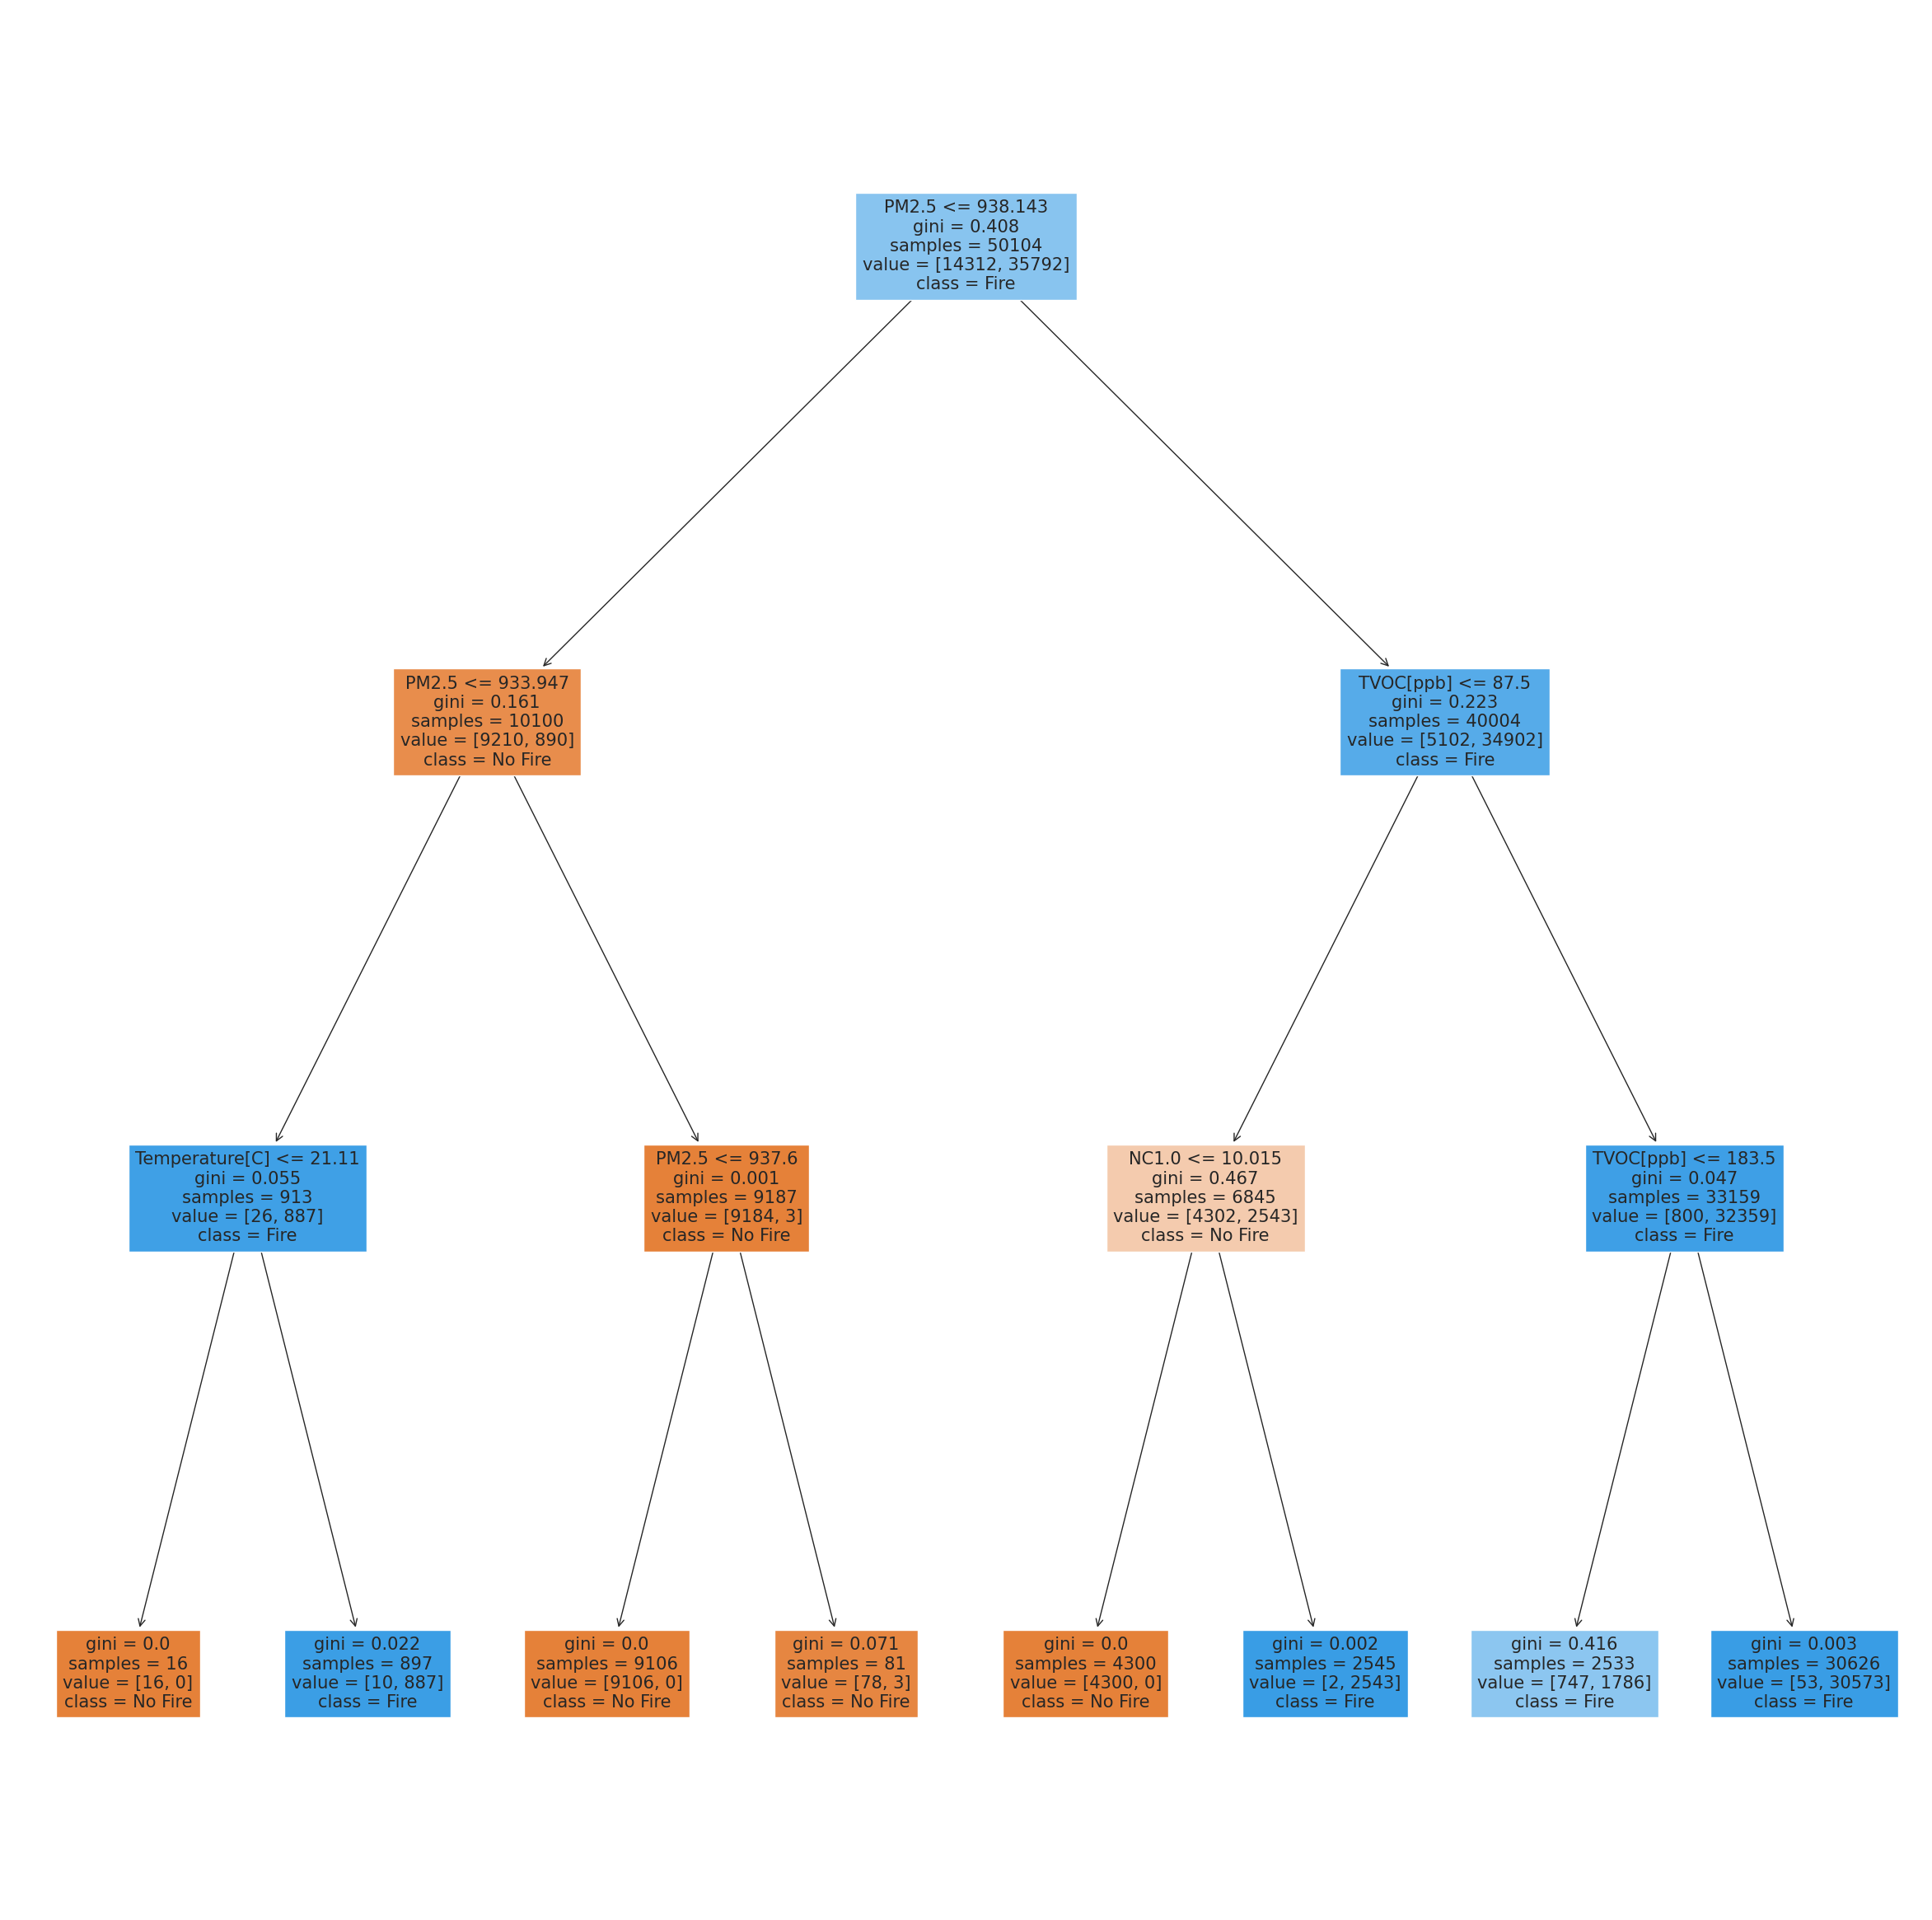

In [110]:
fig = plt.figure(figsize=(30, 30))
plot_tree(model,
          feature_names=['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'Raw H2', 'Pressure[hPa]', 'PM2.5', 'NC0.5',
                         'NC1.0', 'NC2.5'],
          class_names=['No Fire', 'Fire'], 
          filled=True)
# plt.show()
fig.savefig(os.getcwd() + "/decistion_tree.png")